In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  StandardScaler,LabelEncoder
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
def multiple_histogram(data):
    
    num_row = math.ceil(len(data.columns) / 3)
    fig = make_subplots(rows=num_row, cols=3,subplot_titles=(df.columns))

    place_col = 1
    place_row = 1
    for i in data.columns:

        fig.add_trace(go.Histogram(x=data[i]),row=place_row, col=place_col)

        place_col += 1
        if place_col == 4:
            place_col = 1
            place_row += 1
    return fig.update_layout(height=1600, width=1100,
                          title_text="Multiple Histogram for all featrues")



def multiple_boxplot(data):
    
    num_row = math.ceil(len(data.columns) / 3)
    fig = make_subplots(rows=num_row, cols=3,subplot_titles=(df.columns))

    place_col = 1
    place_row = 1
    for i in data.columns:

        fig.add_trace(go.Box(y=data[i]),row=place_row, col=place_col)

        place_col += 1
        if place_col == 4:
            place_col = 1
            place_row += 1
    return fig.update_layout(height=1600, width=1100,
                          title_text="Multiple Histogram for all featrues")

def check_nulls(X_data):
    
    unusual_nulls = X_data[X_data.isin(['{}','[]', "?", ".", "-", "_", "", " ", "  "])].sum()

    nulls_df = pd.concat([X_data.isna().sum(), unusual_nulls], axis=1)
    nulls_df.columns = ["usual_nulls", "strange_nulls"]
    nulls_df = nulls_df.sort_values('usual_nulls', ascending = False)
    return nulls_df


In [3]:
df=pd.read_csv(r'C:\Users\midoel3ila\Downloads\CarPrice_Assignment.csv', error_bad_lines=False)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.columns.values

array(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#  Data Cleaning

In [7]:
def find_missing_percent(data):
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

In [8]:
find_missing_percent(df)

,ColumnName,TotalMissingVals,PercentMissing
0,car_ID,0.0,0.0
1,symboling,0.0,0.0
2,CarName,0.0,0.0
3,fueltype,0.0,0.0
4,aspiration,0.0,0.0
5,doornumber,0.0,0.0
6,carbody,0.0,0.0
7,drivewheel,0.0,0.0
8,enginelocation,0.0,0.0
9,wheelbase,0.0,0.0


In [9]:
df.duplicated().sum() 


0

In [10]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:


df=df.drop(['car_ID'],axis=1)



In [12]:
check_nulls(df)

,usual_nulls,strange_nulls
symboling,0,0.0
enginetype,0,0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0


<Axes: >

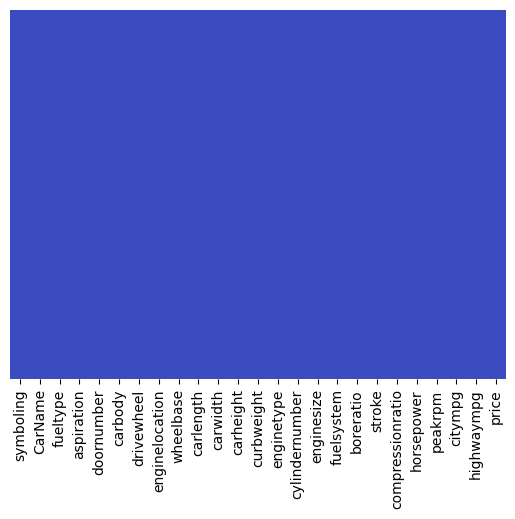

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [14]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)

In [15]:
df['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [16]:
df.CompanyName.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [17]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [18]:
df.dtypes

symboling             int64
CarName              object
CompanyName          object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [19]:
df.head(10)

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [20]:
numerical_data=df.select_dtypes(['int64','float64']).columns
numerical_data

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [21]:
categorical_data=df.select_dtypes(['object']).columns
categorical_data

Index(['CarName', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

# EDA

In [22]:

multiple_histogram(df)

In [23]:
categorical_data

Index(['CarName', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [24]:
px.bar(df, x='doornumber',color='doornumber',width=600)


In [25]:
px.bar(df, x='drivewheel',color='drivewheel',width=600)


In [26]:
px.bar(df, x='fueltype',color='fueltype',width=600)


In [27]:
px.bar(df, x='cylindernumber',color='cylindernumber',width=600)


In [28]:
categorical_data

Index(['CarName', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [29]:
px.bar(df, x='enginelocation',color='enginelocation',width=600)


In [30]:
px.bar(df, x='enginetype',color='enginetype',width=600)


In [31]:
px.bar(df, x='fuelsystem',color='fuelsystem',width=600)


In [32]:
df['CompanyName'].value_counts()

toyota         32
mazda          17
nissan         17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Nissan          1
Name: CompanyName, dtype: int64

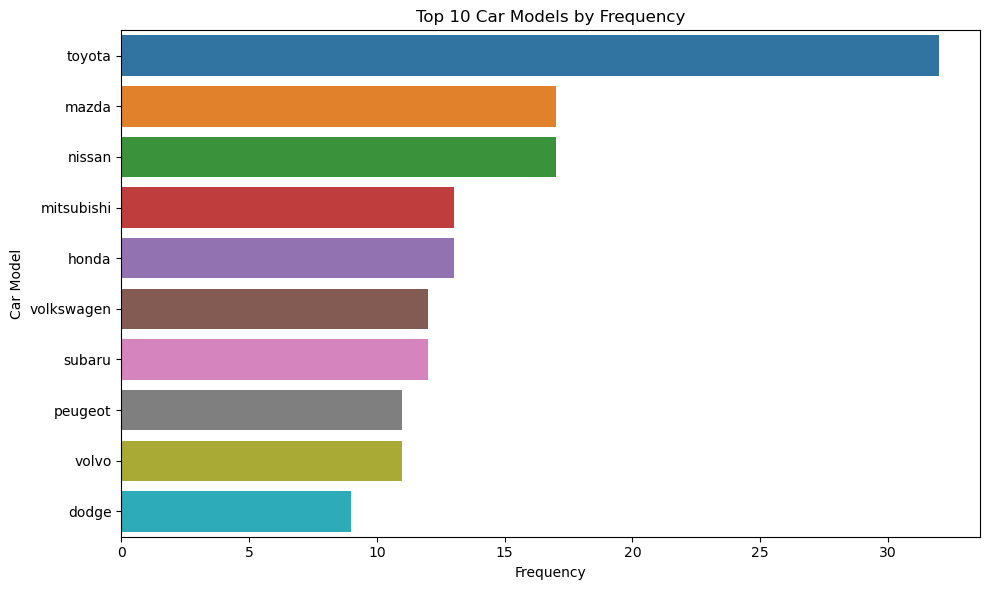

In [33]:
top_car_models = df['CompanyName'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {10} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [34]:
ep = df['carbody'].value_counts().reset_index()
ep.columns = [
    'carbody', 
    'percent'
]
ep['percent'] /= len(df)

fig = px.pie(
    ep, 
    names='carbody', 
    values='percent', 
    title='Countplot of carbody', 
    width=600,
    height=500 )

fig.show()

In [35]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [36]:
#univariete 
px.bar(df, y='price', x='carbody', text_auto='.2s',width=600,height=500,color='carbody')

In [37]:

px.bar(df, y='price', x='fueltype', text_auto='.2s',width=600,height=500,color='fueltype')

In [38]:
x=df['CompanyName'].index

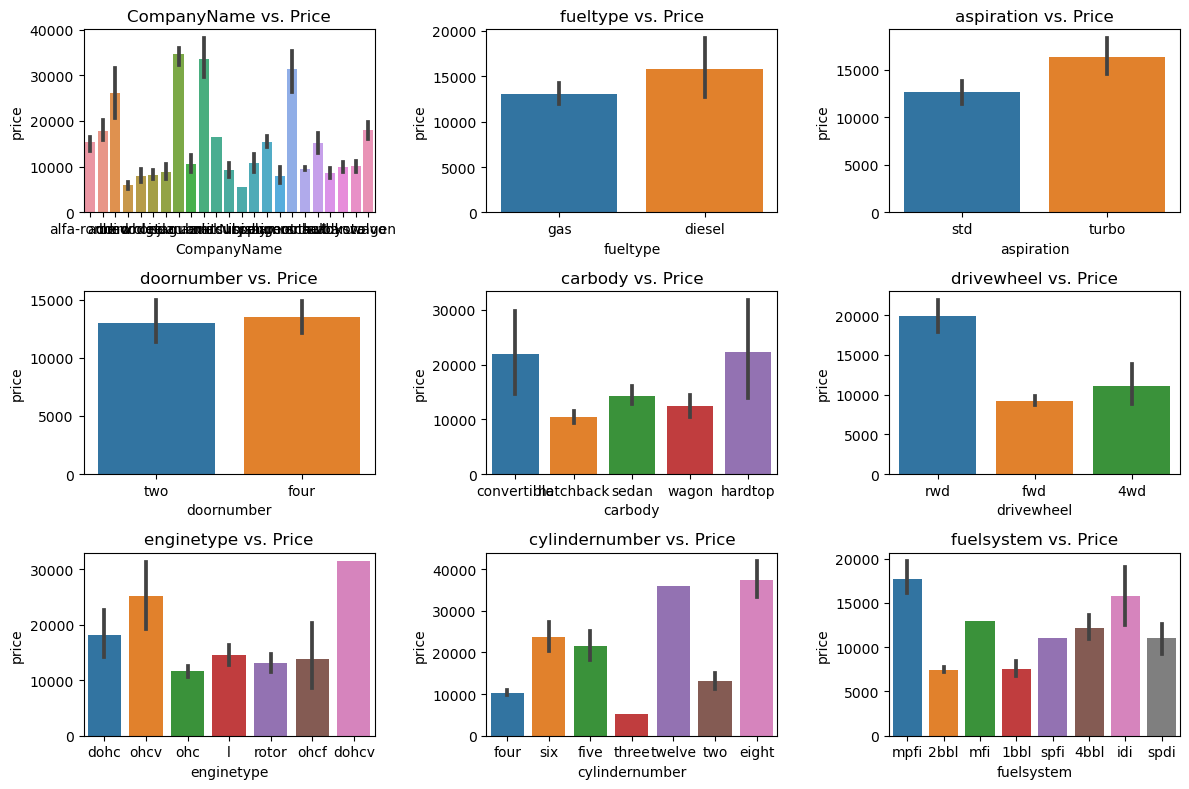

In [39]:
categrical_columns=["CompanyName","fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
"cylindernumber","fuelsystem"]
plt.figure(figsize=(12,8))
for feature in categrical_columns:
    plt.subplot(3, 3, categrical_columns.index(feature) + 1)
    sns.barplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

In [40]:
px.bar(df,y='CompanyName',orientation='h',color='CompanyName',text=x)

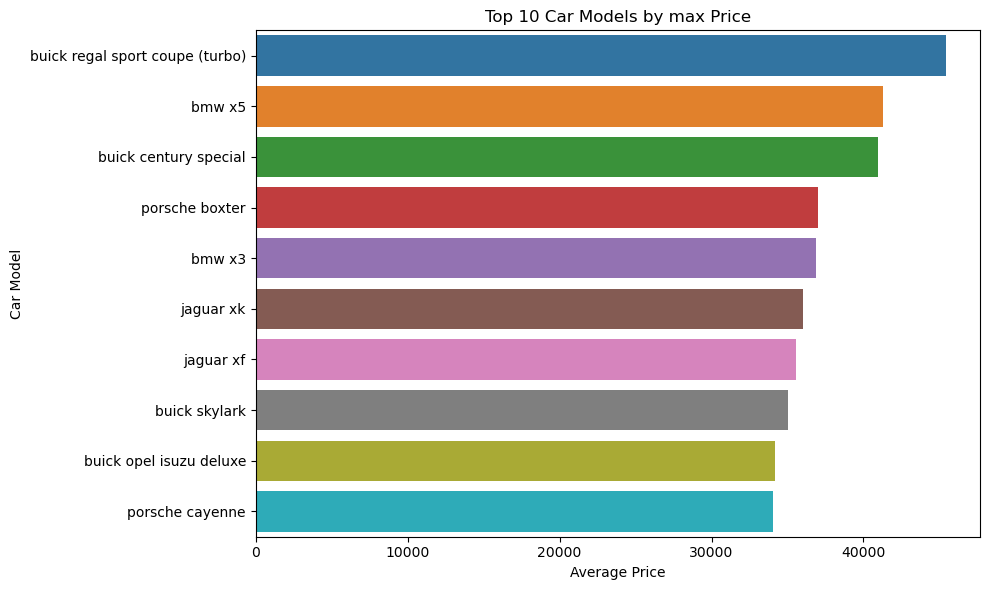

In [41]:
avg_prices_by_car = df.groupby('CarName')['price'].max().sort_values(ascending=False)
top_car_models = avg_prices_by_car.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top 10 Car Models by max Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [42]:
df.head(1)

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [43]:
px.scatter(df,x='horsepower',y='price',width=600)

In [44]:
px.scatter(df,x='enginesize',y='price',width=600)

In [45]:
px.scatter(df,x='highwaympg',y='price',width=600)

In [46]:
	
px.scatter(df,x='peakrpm',y='price',width=600)


In [47]:
px.scatter(df,x='stroke',y='price',width=600)


In [48]:

px.scatter(df,x='wheelbase',y='price',width=600)



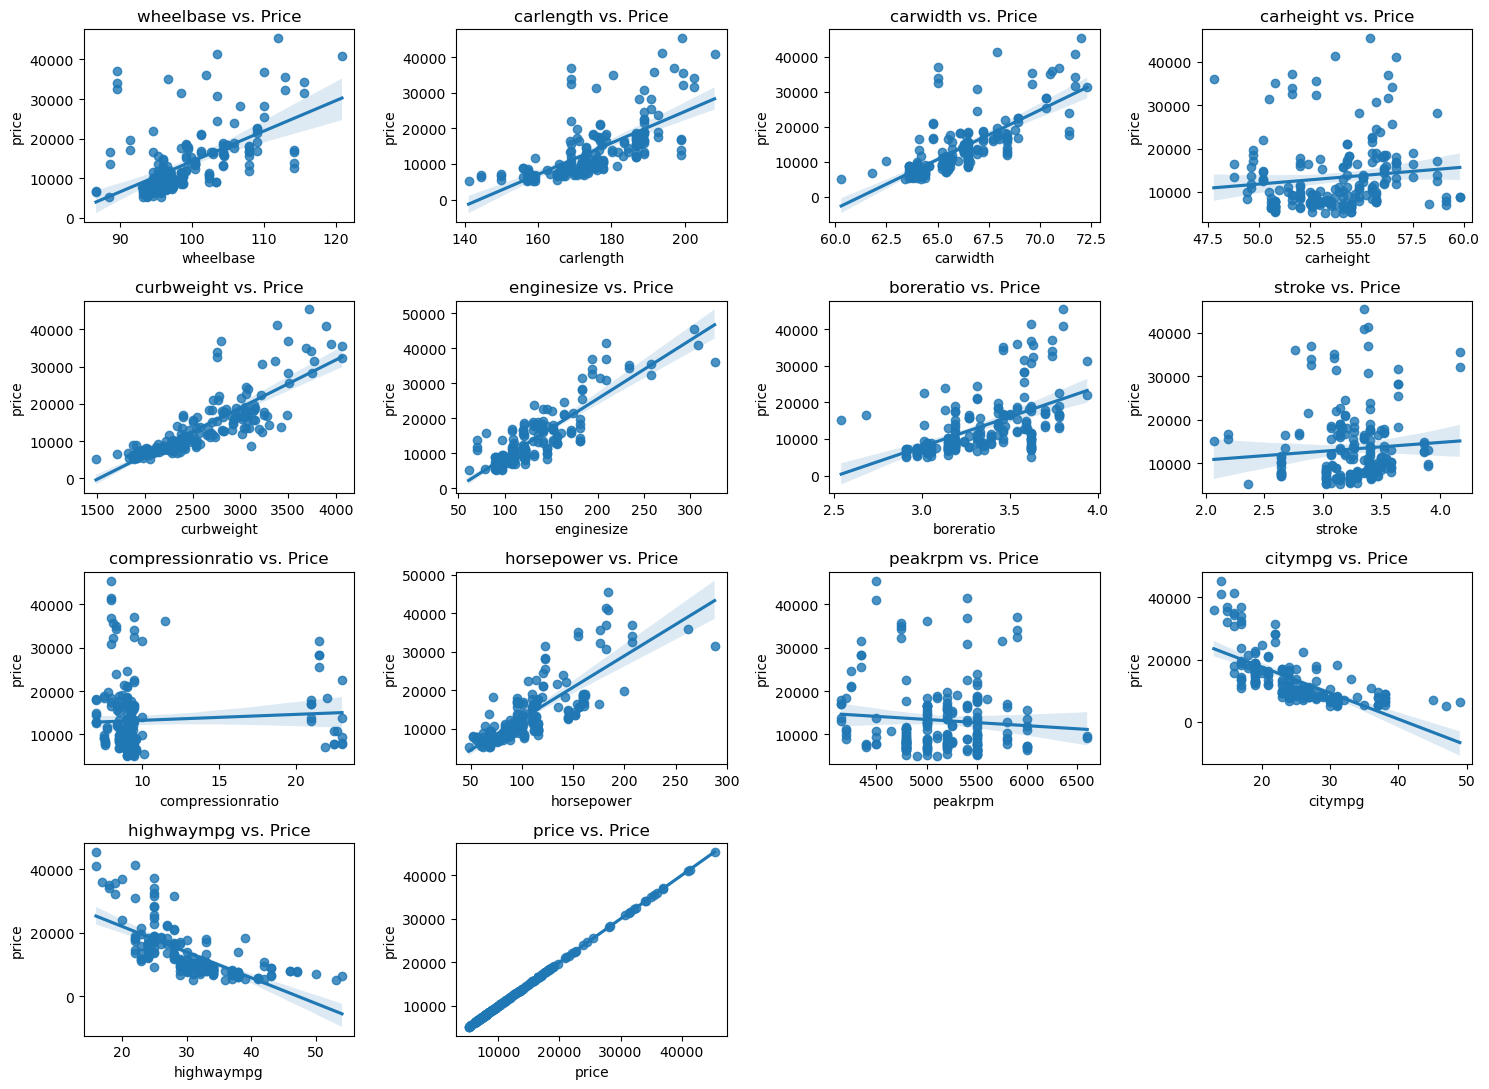

In [49]:
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']
plt.figure(figsize=(15, 11))
for feature in numerical_features:
    plt.subplot(4, 4, numerical_features.index(feature) + 1)
    sns.regplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

<Axes: >

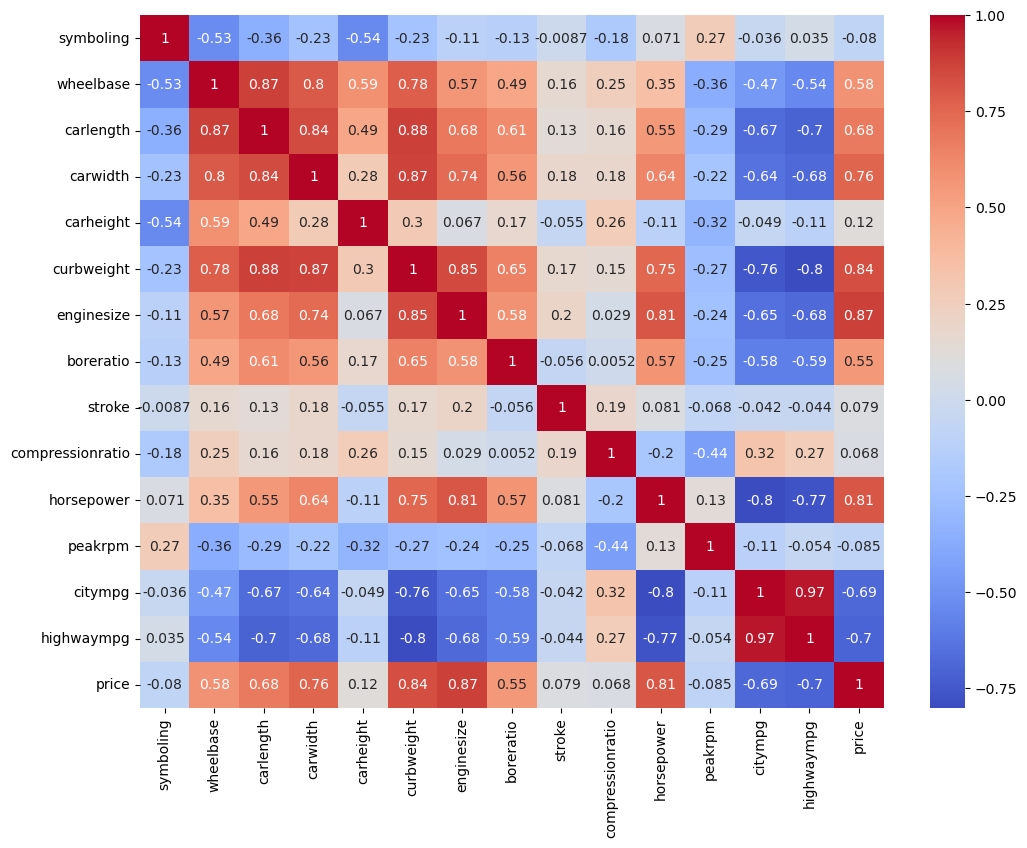

In [50]:
correlationmatrix=df[numerical_data].corr()
plt.figure(figsize=(12,9))
sns.heatmap(correlationmatrix,annot=True, cmap='coolwarm')

In [51]:
correlationmatrix["price"].sort_values(ascending=False)


price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

# Data preprocessing 

In [52]:
df


,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [53]:
#Feature Engineering

avg_price = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
avg_price


CompanyName,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,5499.0,15498.33,17859.17,26118.75,33647.0,6007.0,7875.44,8184.69,8916.5,34600.0,...,10704.88,15489.09,7963.43,31400.5,9595.0,15223.33,8541.25,9885.81,10077.5,18063.18


In [54]:
df

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [55]:
df = df.merge(avg_price.T,how="left",on="CompanyName")
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']

In [56]:
df

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,power_to_weight_ratio
0,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33,0.043564
1,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33,0.043564
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.33,0.054552
3,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.17,0.043646
4,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.17,0.040722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,18063.18,0.038618
201,-1,volvo 144ea,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,18063.18,0.052476
202,-1,volvo 244dl,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,18063.18,0.044489
203,-1,volvo 246,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,18063.18,0.032950


In [57]:
bins = [0,10000,25000,40000]
cars_bin=['lowend','Medium','Highend']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df.head()

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,power_to_weight_ratio,CarsRange
0,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,15498.33,0.043564,Medium
1,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,15498.33,0.043564,Medium
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,15498.33,0.054552,Medium
3,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,17859.17,0.043646,Medium
4,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,17859.17,0.040722,Medium


In [58]:
correlationmatrix["price"].sort_values(ascending=False)


price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [59]:
multiple_boxplot(df)

In [60]:
df.head(10)

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,power_to_weight_ratio,CarsRange
0,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.000,15498.33,0.043564,Medium
1,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.000,15498.33,0.043564,Medium
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.000,15498.33,0.054552,Medium
3,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.000,17859.17,0.043646,Medium
4,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.000,17859.17,0.040722,Medium
5,2,audi fox,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110,5500,19,25,15250.000,17859.17,0.043877,Medium
6,1,audi 100ls,audi,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,17710.000,17859.17,0.038678,Medium
7,1,audi 5000,audi,gas,std,four,wagon,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,18920.000,17859.17,0.037238,Medium
8,1,audi 4000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.3,140,5500,17,20,23875.000,17859.17,0.045366,Medium
9,0,audi 5000s (diesel),audi,gas,turbo,two,hatchback,4wd,front,99.5,...,3.40,7.0,160,5500,16,22,17859.167,17859.17,0.052407,Medium


In [61]:
#label encoding 
cat_columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
"cylindernumber","fuelsystem","CarsRange"]
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [62]:
df.head()

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,power_to_weight_ratio,CarsRange
0,3,alfa-romero giulia,alfa-romero,1,0,1,0,2,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,15498.33,0.043564,1
1,3,alfa-romero stelvio,alfa-romero,1,0,1,0,2,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,15498.33,0.043564,1
2,1,alfa-romero Quadrifoglio,alfa-romero,1,0,1,2,2,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,15498.33,0.054552,1
3,2,audi 100 ls,audi,1,0,0,3,1,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,17859.17,0.043646,1
4,2,audi 100ls,audi,1,0,0,3,0,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,17859.17,0.040722,1


In [63]:
#importance Feature
new_df = df[['fueltype','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange','power_to_weight_ratio','compressionratio','carheight','stroke','peakrpm','mean']]
new_df.head()

,fueltype,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,...,citympg,highwaympg,price,CarsRange,power_to_weight_ratio,compressionratio,carheight,stroke,peakrpm,mean
0,1,1,0,2,0,2,5,88.6,168.8,64.1,...,21,27,13495.0,1,0.043564,9.0,48.8,2.68,5000,15498.33
1,1,1,0,2,0,2,5,88.6,168.8,64.1,...,21,27,16500.0,1,0.043564,9.0,48.8,2.68,5000,15498.33
2,1,1,2,2,5,3,5,94.5,171.2,65.5,...,19,26,16500.0,1,0.054552,9.0,52.4,3.47,5000,15498.33
3,1,0,3,1,3,2,5,99.8,176.6,66.2,...,24,30,13950.0,1,0.043646,10.0,54.3,3.40,5500,17859.17
4,1,0,3,0,3,1,5,99.4,176.6,66.4,...,18,22,17450.0,1,0.040722,8.0,54.3,3.40,5500,17859.17


In [64]:
#Feature Scaling
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg','mean','power_to_weight_ratio']
scaler=StandardScaler()
new_df[numerical_columns] = scaler.fit_transform(new_df[numerical_columns])


In [65]:
df.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,power_to_weight_ratio,CarsRange
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.439024,2.614634,1.326829,98.756585,174.049268,65.907805,53.724878,...,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,13276.709366,0.040063,1.351220
std,1.245307,0.297446,0.385535,0.497483,0.859081,0.556171,6.021776,12.337289,2.145204,2.443522,...,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,7162.943184,0.009570,0.681378
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,...,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,5499.000000,0.019936,0.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,94.500000,166.300000,64.100000,52.000000,...,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,9239.770000,0.034188,1.000000
50%,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,97.000000,173.200000,65.500000,54.100000,...,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,10077.500000,0.037801,1.000000
75%,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,102.400000,183.100000,66.900000,55.500000,...,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,15489.090000,0.044489,2.000000
max,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,120.900000,208.100000,72.300000,59.800000,...,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,34600.000000,0.085561,2.000000


In [66]:
new_df.head()

,fueltype,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,...,citympg,highwaympg,price,CarsRange,power_to_weight_ratio,compressionratio,carheight,stroke,peakrpm,mean
0,1,1,0,2,0,2,5,-1.690772,-0.426521,-0.844782,...,-0.646553,-0.546059,13495.0,1,0.366684,-0.288349,-2.020417,-1.839377,-0.262960,0.310914
1,1,1,0,2,0,2,5,-1.690772,-0.426521,-0.844782,...,-0.646553,-0.546059,16500.0,1,0.366684,-0.288349,-2.020417,-1.839377,-0.262960,0.310914
2,1,1,2,2,5,3,5,-0.708596,-0.231513,-0.190566,...,-0.953012,-0.691627,16500.0,1,1.517678,-0.288349,-0.543527,0.685946,-0.262960,0.310914
3,1,0,3,1,3,2,5,0.173698,0.207256,0.136542,...,-0.186865,-0.109354,13950.0,1,0.375286,-0.035973,0.235942,0.462183,0.787855,0.641312
4,1,0,3,0,3,1,5,0.107110,0.207256,0.230001,...,-1.106241,-1.273900,17450.0,1,0.069076,-0.540725,0.235942,0.462183,0.787855,0.641312


# Model



In [67]:
#Train ,TEST 
x = new_df.drop(columns=["price"])
y = new_df["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
training_score = []
testing_score = []


In [68]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred= model.predict(x_train)
    x_test_pred= model.predict(x_test)
    r2train = r2_score(y_train,x_train_pred)*100
    r2test = r2_score(y_test,x_test_pred)*100
    msetrain = mean_squared_error(y_train, x_train_pred)
    rmstrain = np.sqrt(msetrain)
    msetest = mean_squared_error(y_test, x_test_pred)
    rmstest = np.sqrt(msetest)
    training_score.append(r2train)
    testing_score.append(r2test)
    print(f"r2_Score of {model} model on training Data is:",r2train)
    print(f"r2_Score of {model} model on testing Data is:",r2test)
    print(f"RMSE of {model} model on training Data is:",rmstrain)
    print(f"RMSE of {model} model on testing Data is:",rmstest)


In [69]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on training Data is: 94.3955865021546
r2_Score of LinearRegression() model on testing Data is: 86.1961445816648
RMSE of LinearRegression() model on training Data is: 1828.2097823511313
RMSE of LinearRegression() model on testing Data is: 3301.108677951742


In [70]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on training Data is: 99.86537119069865
r2_Score of DecisionTreeRegressor() model on testing Data is: 88.45533530239578
RMSE of DecisionTreeRegressor() model on training Data is: 283.3543900592572
RMSE of DecisionTreeRegressor() model on testing Data is: 3018.9108150727384


In [71]:
model_prediction(RandomForestRegressor())


r2_Score of RandomForestRegressor() model on training Data is: 98.9705455457236
r2_Score of RandomForestRegressor() model on testing Data is: 94.73617838287744
RMSE of RandomForestRegressor() model on training Data is: 783.5460250708635
RMSE of RandomForestRegressor() model on testing Data is: 2038.4975929564318


In [72]:
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on training Data is: 99.86534421949145
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_

# Model Evaluation 

In [73]:
models = ["Linear Regression","Decision Tree","Random Forest","XGBoost"]


In [74]:
training_score

[94.3955865021546, 99.86537119069865, 98.9705455457236, 99.86534421949145]

In [75]:
testing_score

[86.1961445816648, 88.45533530239578, 94.73617838287744, 93.04544756138523]

In [76]:
model_df = pd.DataFrame({"Algorithm":models, "Training Score":training_score,"Testing Score":testing_score})
model_df

,Algorithm,Training Score,Testing Score
0,Linear Regression,94.395587,86.196145
1,Decision Tree,99.865371,88.455335
2,Random Forest,98.970546,94.736178
3,XGBoost,99.865344,93.045448


In [77]:

fig = go.Figure(go.Bar(x=model_df['Testing Score'],y=model_df['Algorithm'],orientation='h',text=model_df['Testing Score']))
fig.show()

In [78]:
fig = go.Figure(go.Bar(x=model_df['Training Score'],y=model_df['Algorithm'],orientation='h',text=model_df['Training Score']))
fig.show()

In [79]:
lin_model = RandomForestRegressor()
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.44


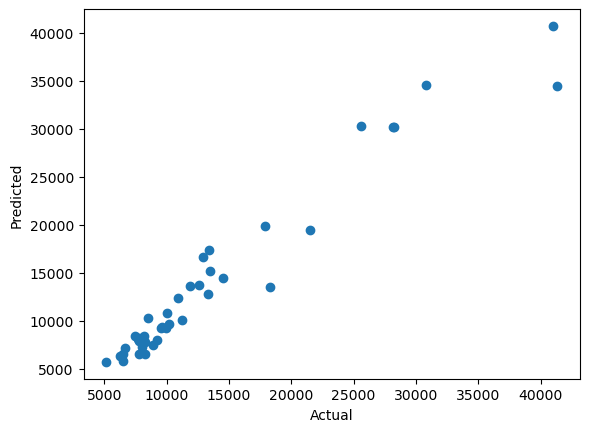

In [80]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [81]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.head(10)

,Actual Value,Predicted Value,Difference
15,30760.000,34532.380000,-3772.380000
9,17859.167,19864.960000,-2005.793000
100,9549.000,9282.220000,266.780000
132,11850.000,13596.669167,-1746.669167
68,28248.000,30145.745000,-1897.745000
95,7799.000,6514.370000,1284.630000
159,7788.000,7903.040000,-115.040000
162,9258.000,7970.950000,1287.050000
147,10198.000,9667.160000,530.840000
182,7775.000,8210.365000,-435.365000
